In [3]:
library(rstan)

Warning message:
"il pacchetto 'rstan' è stato creato con R versione 4.4.3"
Caricamento del pacchetto richiesto: StanHeaders

Warning message:
"il pacchetto 'StanHeaders' è stato creato con R versione 4.4.3"

rstan version 2.32.7 (Stan version 2.32.2)


For execution on a local, multicore CPU with excess RAM we recommend calling
options(mc.cores = parallel::detectCores()).
To avoid recompilation of unchanged Stan programs, we recommend calling
rstan_options(auto_write = TRUE)
For within-chain threading using `reduce_sum()` or `map_rect()` Stan functions,
change `threads_per_chain` option:
rstan_options(threads_per_chain = 1)


Do not specify '-march=native' in 'LOCAL_CPPFLAGS' or a Makevars file



In [5]:
options(mc.cores = parallel::detectCores())

In [6]:
rstan_options(auto_write = TRUE)

## Exercise 1

Inference for Stan model: anon_model.
4 chains, each with iter=4000; warmup=2000; thin=1; 
post-warmup draws per chain=2000, total post-warmup draws=8000.

       mean se_mean   sd  2.5% 97.5% n_eff Rhat
beta0  4.98    0.01 1.00  2.98  6.93  7681    1
beta1  0.00    0.01 0.56 -0.94  0.94  8289    1
beta2 25.05    0.01 1.25 22.58 27.45  7134    1

Samples were drawn using NUTS(diag_e) at Mon May 26 16:18:07 2025.
For each parameter, n_eff is a crude measure of effective sample size,
and Rhat is the potential scale reduction factor on split chains (at 
convergence, Rhat=1).


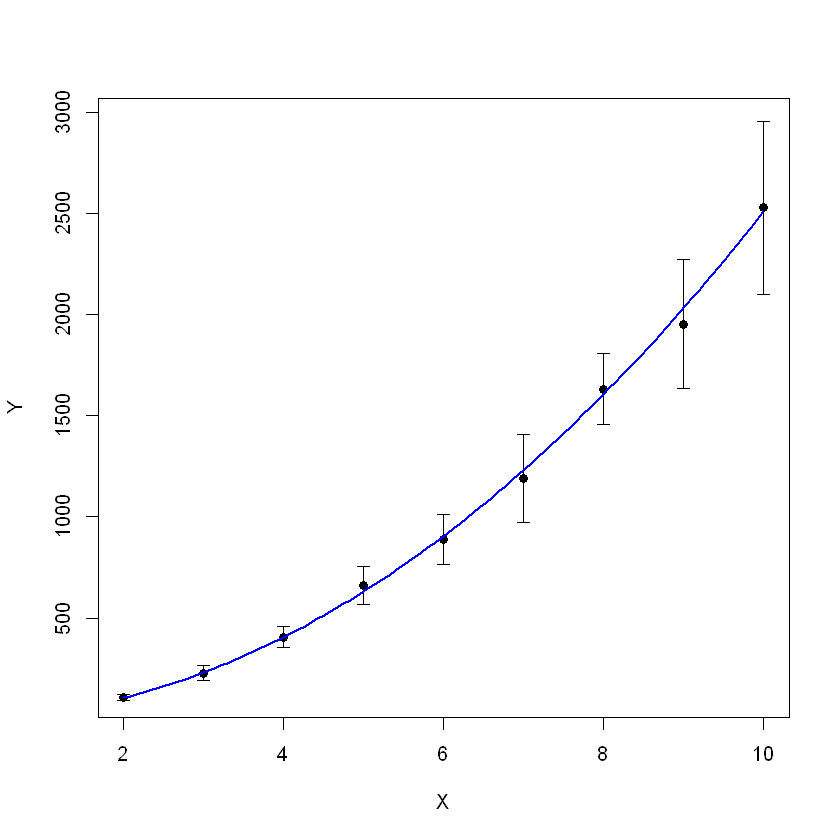

In [ ]:
X <- 2:10
Y <- c(105.5203, 227.4457, 405.6937, 661.2858, 886.1422,
       1189.6514, 1631.8262, 1951.8381, 2528.5246)
sigma <- c(15.40459, 36.05480, 51.84040, 94.66744, 123.79828,
           216.99935, 173.83507, 318.46511, 427.27788)
n <- length(X)

data_list <- list(
  N = n,
  x = X,
  y = Y,
  sigma = sigma
)

stan_code <- "
data {
  int<lower=0> N;
  vector[N] x;
  vector[N] y;
  vector<lower=0>[N] sigma;
}
parameters {
  real beta0;
  real<lower=-1, upper=1> beta1;
  real beta2;
}
model {
  beta0 ~ normal(5, 1);
  beta2 ~ normal(30, 15);
  
  for (i in 1:N)
    y[i] ~ normal(beta0 + beta1 * x[i] + beta2 * square(x[i]), sigma[i]);
}
"
model <- stan(model_code = stan_code, data = data_list, iter = 4000, chains = 4, seed = 123)
print(model, pars = c("beta0", "beta1", "beta2"), probs = c(0.025, 0.975))

posterior <- extract(model)
b0 <- mean(posterior$beta0)
b1 <- mean(posterior$beta1)
b2 <- mean(posterior$beta2)

x_plot <- seq(min(X), max(X), length.out = 100)
y_fit <- b0 + b1 * x_plot + b2 * x_plot^2

plot(X, Y, ylim = range(Y + sigma), pch = 16, xlab = "X", ylab = "Y")
arrows(X, Y - sigma, X, Y + sigma, angle = 90, code = 3, length = 0.05)
lines(x_plot, y_fit, col = "blue", lwd = 2)


## Exercise 2

Mean: 0.08661417 	Variance: 0.0006180637 	95% C.I.: 0.04438876 0.1411131

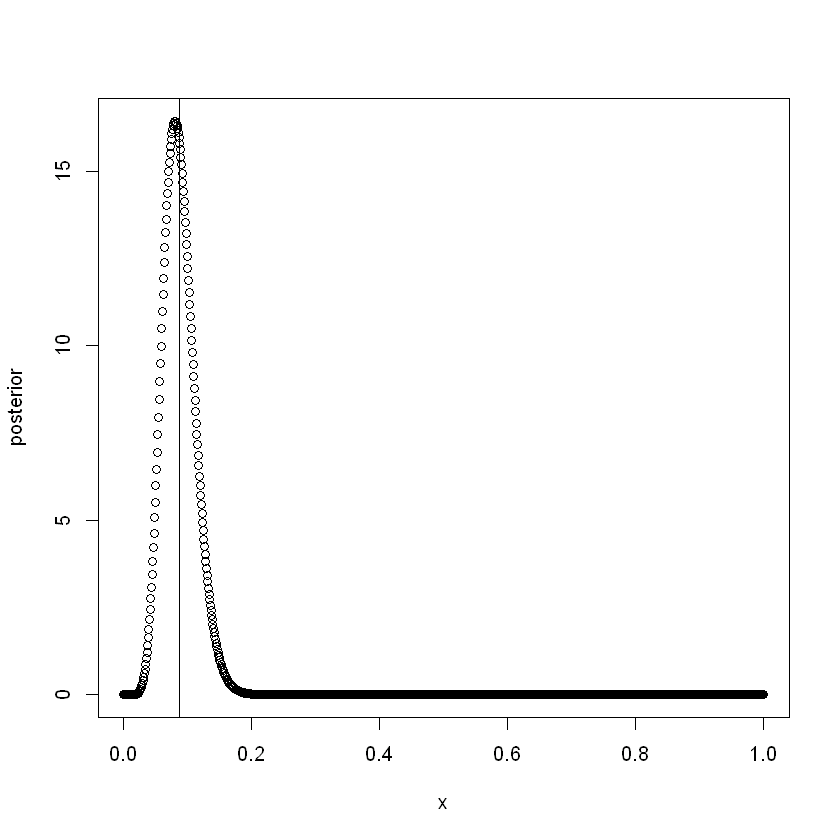


y=10 lies inside the acceptance region, so there is no strong evidence that p!=0.1
We have already computed the 95% Credibility Interval: 0.04438876 0.1411131  and p=0.1 lies inside, so the null hypothesis is accepted

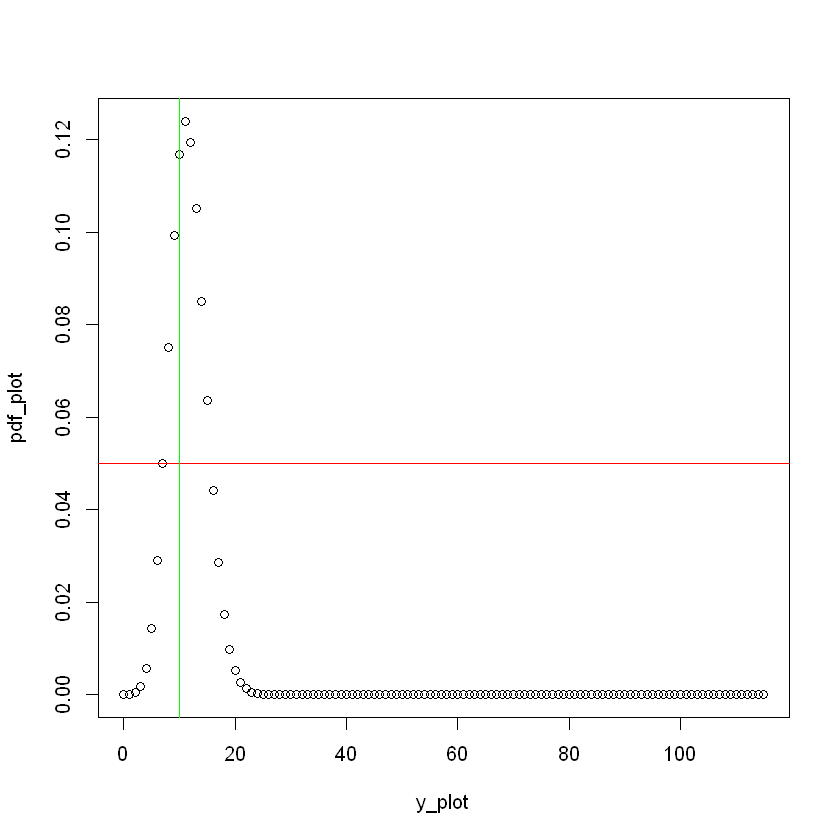

In [26]:
n <- 115
y <- 10

p_f <- y / n

x <- seq(0, 1, 0.001)
prior <- dbeta(x, 1, 11)
a <- 1 + y
b <- 11 + n - y
posterior <- dbeta(x, a, b)

post_mean <- a / (a + b)
post_var <- a * b / ((a + b)^2 * (a + b + 1))
post_ci95 <- qbeta(c(0.025, 0.975), a, b)

plot(x, posterior)
abline(v = post_mean)

cat("Mean:", post_mean,"\tVariance:", post_var, "\t95% C.I.:", post_ci95)

#2 side hypothesis test: frequentist approach
y_plot <- 0:n
pdf_plot <- dbinom(y_plot, n, 0.1)
plot(y_plot, pdf_plot)
abline(h = 0.05, col='red')
abline(v = y, col='green')
cat("\ny=10 lies inside the acceptance region, so there is no strong evidence that p!=0.1")

#2 side hypothesis test: bayesian approach
cat("\nWe have already computed the 95% Credibility Interval:", post_ci95, " and p=0.1 lies inside, so the null hypothesis is accepted")


Beta prior	Mean: 0.05681818 	Variance: 0.0003027677 	95% C.I.: 0.02773918 0.09538012
Previous prior	Mean: 0.06849315 	Variance: 0.0002177537 	95% C.I.: 0.04248352 0.100086

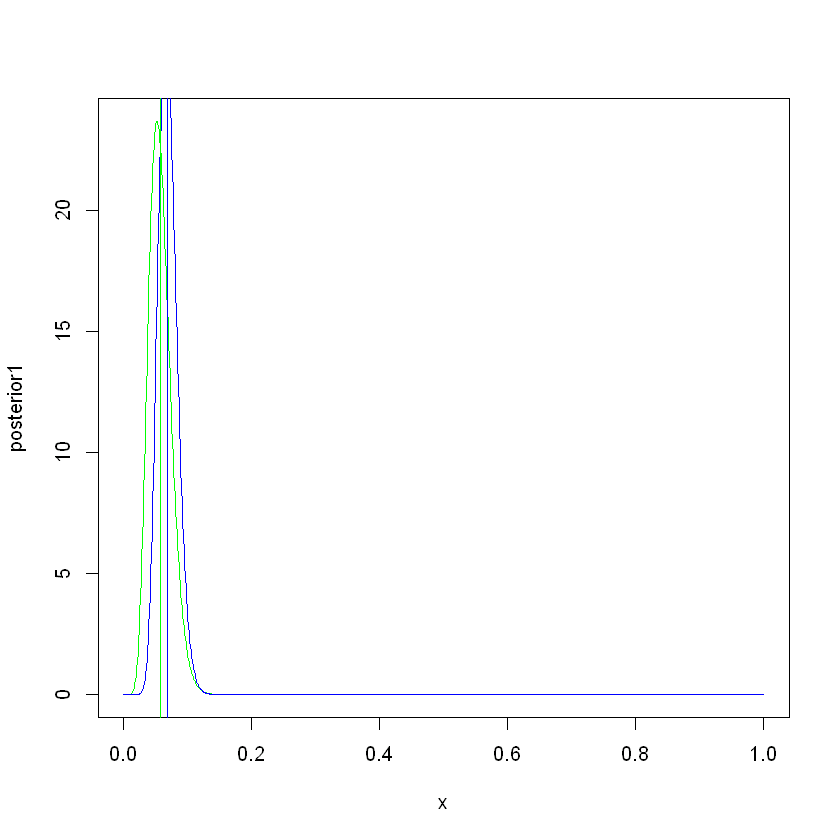


y=9 lies outside the acceptance region, so there is a strong evidence that p!=0.1
We have already computed the 95% Credibility Interval and p=0.1 lies outside the CI for Beta prior and inside when using the previous prior

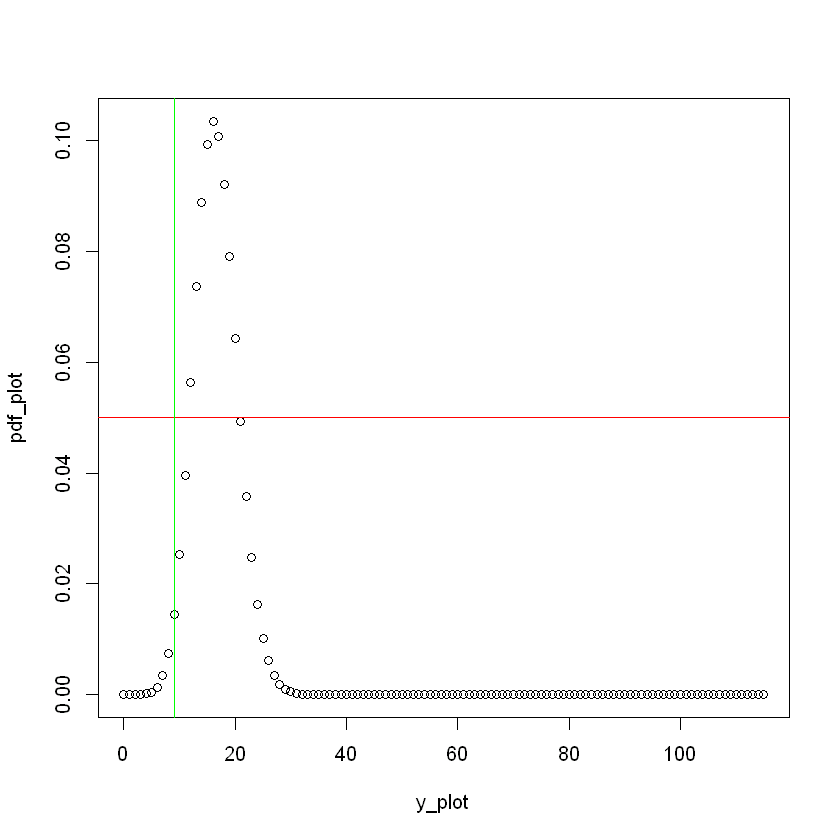

In [25]:
n2 <- 165
y2 <- 9

p_f <- y2 / n2

prior1 <- dbeta(x, 1, 11)
prior2 <- posterior
a1 <- 1 + y2
b1 <- 10 + n2 - y2
a2 <- a + y2
b2 <- b + n2 - y2
posterior1 <- dbeta(x, a1, b1)
posterior2 <- dbeta(x, a2, b2)

post_mean1 <- a1 / (a1 + b1)
post_mean2 <- a2 / (a2 + b2)
post_var1 <- a1 * b1 / ((a1 + b1)^2 * (a1 + b1 + 1))
post_var2 <- a2 * b2 / ((a2 + b2)^2 * (a2 + b2 + 1))
post_ci951 <- qbeta(c(0.025, 0.975), a1, b1)
post_ci952 <- qbeta(c(0.025, 0.975), a2, b2)

plot(x, posterior1, type='l', col='green')
lines(x, posterior2, col='blue')
abline(v = post_mean1, col='green')
abline(v = post_mean2, col='blue')

cat("Beta prior\tMean:", post_mean1,"\tVariance:", post_var1, "\t95% C.I.:", post_ci951)
cat("\nPrevious prior\tMean:", post_mean2,"\tVariance:", post_var2, "\t95% C.I.:", post_ci952)

#2 side hypothesis test: frequentist approach
y_plot <- 0:n
pdf_plot <- dbinom(y_plot, n2, 0.1)
plot(y_plot, pdf_plot)
abline(h = 0.05, col='red')
abline(v = y2, col='green')
cat("\ny=9 lies outside the acceptance region, so there is a strong evidence that p!=0.1")

#2 side hypothesis test: bayesian approach
cat("\nWe have already computed the 95% Credibility Interval and p=0.1 lies outside the CI for Beta prior and inside when using the previous prior")


## Exercise 3

Inference for Stan model: anon_model.
4 chains, each with iter=4000; warmup=1000; thin=1; 
post-warmup draws per chain=3000, total post-warmup draws=12000.

  mean se_mean   sd 2.5%  50% 97.5% n_eff Rhat
p 0.09       0 0.03 0.04 0.08  0.14  4305    1

Samples were drawn using NUTS(diag_e) at Mon May 26 22:10:06 2025.
For each parameter, n_eff is a crude measure of effective sample size,
and Rhat is the potential scale reduction factor on split chains (at 
convergence, Rhat=1).
Posterior mean: 0.08617023 
Posterior variance: 0.0006331972 
95% Credible Interval: 0.04338002 0.1417831 


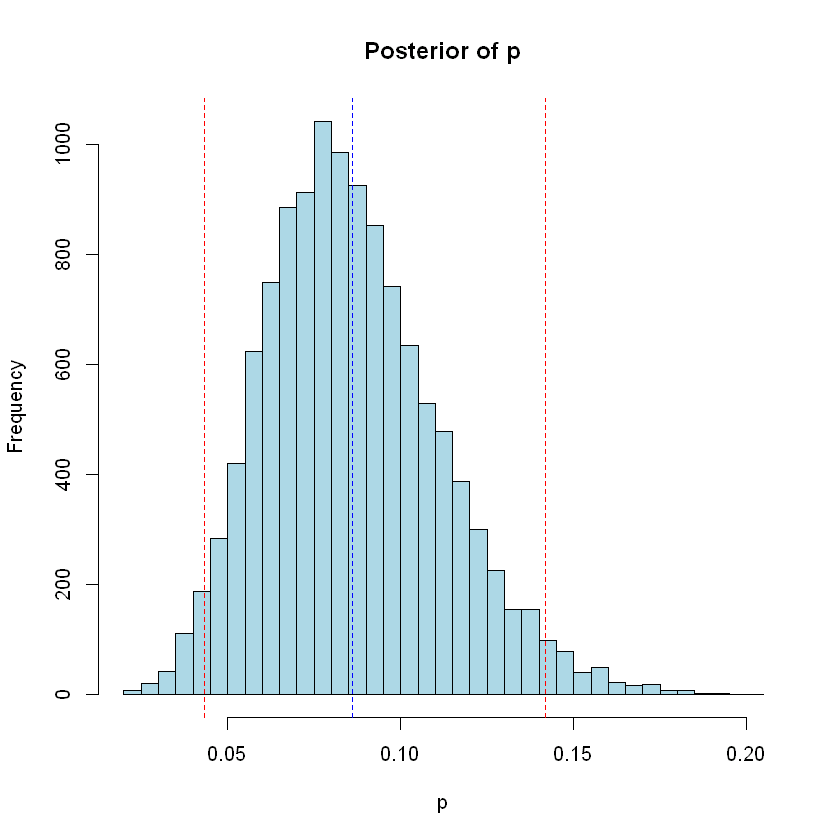

In [28]:
y <- 10
n <- 115

stan_code <- "
data {
  int<lower=0> y;       // number of successes
  int<lower=0> n;       // number of trials
}

parameters {
  real<lower=0, upper=1> p;  // probability
}

model {
  // Prior: Beta(1, 11)
  target += beta_lpdf(p | 1, 11);

  // Likelihood
  y ~ binomial(n, p);
}
"
stan_data <- list(y = y, n = n)

fit <- stan(model_code = stan_code,
            data = stan_data,
            iter = 4000,
            warmup = 1000,
            chains = 4,
            seed = 123)

print(fit, pars = "p", probs = c(0.025, 0.5, 0.975))

posterior_samples <- extract(fit)$p

# Posterior mean and variance
post_mean <- mean(posterior_samples)
post_var <- var(posterior_samples)
post_ci <- quantile(posterior_samples, c(0.025, 0.975))

cat("Posterior mean:", post_mean, "\n")
cat("Posterior variance:", post_var, "\n")
cat("95% Credible Interval:", post_ci, "\n")

# Plot posterior
hist(posterior_samples, breaks = 50, col = "lightblue", main = "Posterior of p", xlab = "p")
abline(v = post_ci, col = "red", lty = 2)
abline(v = post_mean, col = "blue", lty = 2)
